- look at a larger cluster to see if there's any pattern in there.

The over-archng question is are there any distinguishable pattern of these faces I like?
- make an encoding of the dislikes and a total tsne of everything, of just the labeled scatter plot to see if everythign's on one side of another.

In [110]:
import hdbscan
import time
import seaborn as sns
%pylab inline
import pickle
import numpy as np
from sklearn.cluster import DBSCAN
import pandas as pd
from tsne import multithread_map, rescaler

Populating the interactive namespace from numpy and matplotlib


ValueError: attempted relative import beyond top-level package

In [126]:
from PIL import Image
SIZE=(128,128)
def rescaler(im_file):
    try:
        im = Image.open(im_file)
        width, height= (im.size)

        
        #checks if the image is already smaller than the thumbnail
        if width < SIZE[0] or height < SIZE[1]: 
            raise IOError
        
        im = im.resize(SIZE, Image.ANTIALIAS)
        return im

    except IOError:
        print ("cannot create thumbnail for '%s'" % im_file)
        return None

arrays_rescaled = list(map(rescaler, paths))


def montagify(list_of_PIL_images, resize=(96, 96), tiles=(10, 10)):
    from imutils import build_montages
    import numpy as np
    from PIL import Image
    montage = build_montages(
        list_of_PIL_images, 
        resize, 
        tiles
    )[0]

    return Image.fromarray(np.uint8(montage))

In [113]:
data = pickle.loads(open('../encodings.pickle', "rb").read())
paths = ['../' + d['imagePath']  for d in data]
data = np.array(data)
encodings = [d["encoding"] for d in data]


In [160]:
params = {'min_cluster_size': 5, 'allow_single_cluster':False, 'min_samples':1}
clt = hdbscan.HDBSCAN(**params)
clt.fit(encodings)
labelIDs = np.unique(clt.labels_)
print ('value_counts', pd.Series(clt.labels_).value_counts())
numUniqueFaces = len(np.where(labelIDs > -1)[0])
print("[INFO] # unique faces: {}".format(numUniqueFaces))


value_counts -1     136
 16     14
 7      14
 18     13
 9      12
 14     10
 3      10
 19     10
 17      9
 12      8
 11      8
 6       8
 5       7
 2       7
 4       7
 10      6
 8       6
 13      6
 15      5
 0       5
 1       5
dtype: int64
[INFO] # unique faces: 20


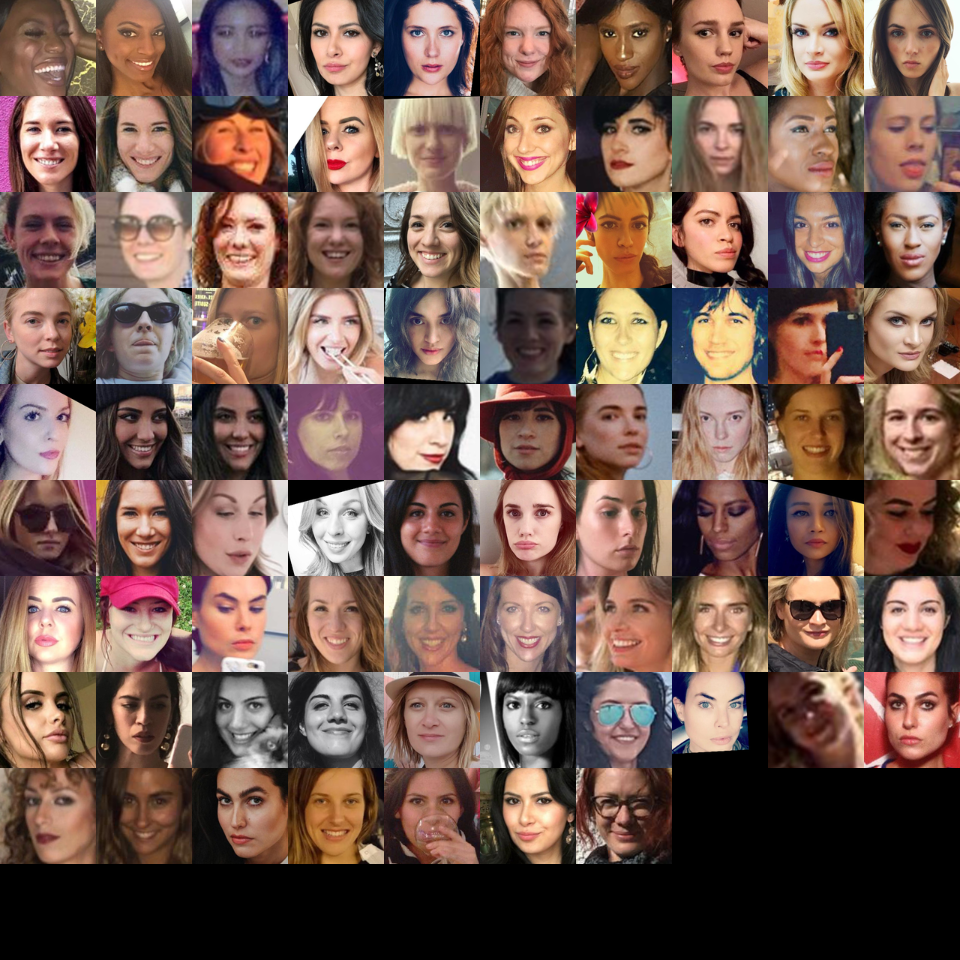

In [137]:
args = np.where(clt.labels_==-1)[0]
montagify([np.array(arrays_rescaled[arg]) for arg in args])

In [95]:
paths[282]

'tinder_pics_likes_faces_deduped/1527428841_Laura_0_face.png'

In [96]:
!open ../tinder_pics_likes_faces_deduped/1527428841_Laura_0_face.png

In [94]:
!open ../tinder_pics_likes_faces_deduped/1526347022_Kristine_3_face.png

In [7]:
curr_pnt = clt.exemplars_[0]

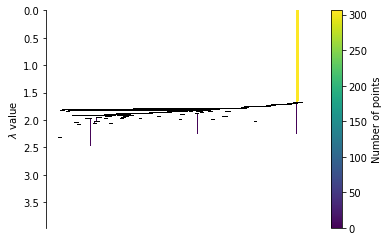

In [8]:
clt.condensed_tree_.plot()

In [65]:
for pnt in clt.exemplars_:
    curr_pnt,pnt

In [10]:
df = pd.DataFrame(encodings)
mediod = df.median(axis=0)
df['distance_from_center'] = df[:].sub(np.array(mediod)).pow(2).sum(1).pow(0.5)
df.shape

(306, 129)

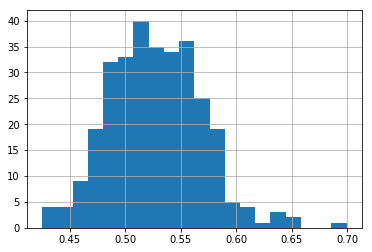

In [11]:
df['distance_from_center'].hist(bins=20)

In [15]:
for center in clt.exemplars_:
    center

In [24]:
clt.exemplars_[2]

array([[-8.60785469e-02,  6.13289513e-02,  3.63662541e-02,
        -7.03487918e-02, -8.62777904e-02,  1.84556693e-02,
         3.65106836e-02, -4.59415838e-02,  2.03849569e-01,
        -1.43126085e-01,  2.10567117e-01, -1.72767993e-02,
        -2.77385294e-01, -6.48174211e-02,  5.65540865e-02,
         2.38025725e-01, -1.60949022e-01, -1.93720087e-01,
        -1.14481673e-01, -7.81355798e-02,  5.53297773e-02,
         4.00307178e-02, -6.45893291e-02,  1.26547381e-01,
        -1.37343079e-01, -2.21873969e-01, -6.25368208e-02,
        -7.32554719e-02, -3.80462036e-02, -9.04791802e-02,
         1.34795867e-02,  1.83784738e-01, -8.09724778e-02,
        -2.15948261e-02,  1.01329364e-01,  1.08879954e-01,
        -6.33670539e-02, -1.41079605e-01,  1.64453059e-01,
        -6.83630928e-02, -2.85851836e-01, -4.75474596e-02,
         1.27077624e-01,  2.27021232e-01,  2.05750048e-01,
        -3.94867137e-02, -2.53177546e-02, -8.56219232e-02,
         9.68921557e-02, -3.08325261e-01,  2.69075856e-0

In [12]:
#find out where most of the clusters are relative to the mediod
#who are the noise?
#who are the largest cluster?
#how can we figure out the mainstream

clt.exemplars_

[array([[-6.93501011e-02,  8.97480771e-02,  7.20989555e-02,
         -9.07362029e-02, -8.67185071e-02, -6.30530855e-03,
         -8.09046850e-02, -1.34438768e-01,  1.71974152e-01,
         -1.18873417e-01,  1.94958583e-01, -2.31921189e-02,
         -2.80089706e-01,  1.91664547e-02,  3.69499624e-03,
          1.43538758e-01, -2.25627214e-01, -3.80104035e-02,
         -4.46827188e-02,  1.02557400e-02,  1.05422482e-01,
          3.49204093e-02,  8.33389610e-02,  6.81558624e-02,
         -1.03841670e-01, -3.51325572e-01, -1.35403812e-01,
         -7.95327425e-02, -1.13216201e-02, -4.44027781e-02,
          1.05511732e-02,  2.60533821e-02, -1.52878523e-01,
          6.05276152e-02,  2.38435082e-02,  3.01740915e-02,
         -9.08224434e-02, -1.76365346e-01,  1.73386171e-01,
         -3.77462432e-02, -1.78844795e-01, -4.78319190e-02,
          3.18831466e-02,  1.38065577e-01,  1.74991474e-01,
         -3.71322930e-02,  9.57302302e-02, -1.06605299e-01,
          1.10779308e-01, -2.63415128e-0

In [38]:
np.argmin(clt.probabilities_)

5

/Users/ajay/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/ajay/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


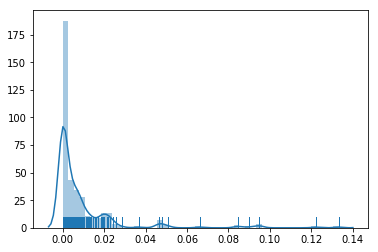

In [161]:
import seaborn as sns

sns.distplot(clt.outlier_scores_[np.isfinite(clt.outlier_scores_)], rug=True)

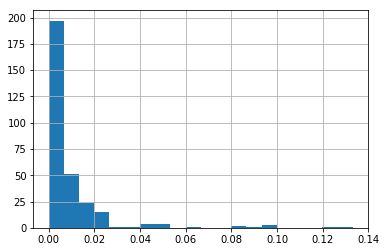

In [165]:
series = pd.Series(clt.outlier_scores_)
series.hist(bins=20)

In [166]:
args = series[series > series.quantile(0.95)].index

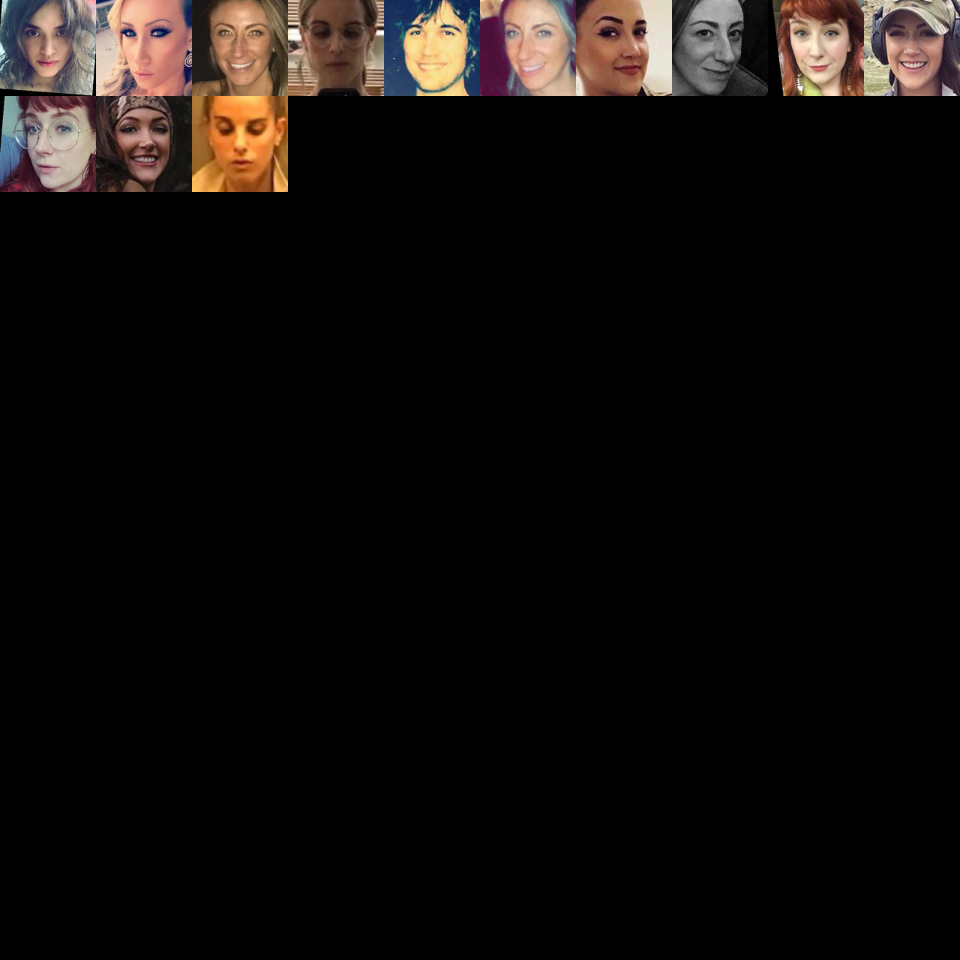

In [167]:
montagify([np.array(arrays_rescaled[arg]) for arg in args])

In [144]:
pd.Series(clt.outlier_scores_).quantile(0.9)

0.021894101119188814

In [6]:
#make a 2-d plot of these exemplars... should we use tsne to project it down?
clt.exemplars_

[array([[-6.93501011e-02,  8.97480771e-02,  7.20989555e-02,
         -9.07362029e-02, -8.67185071e-02, -6.30530855e-03,
         -8.09046850e-02, -1.34438768e-01,  1.71974152e-01,
         -1.18873417e-01,  1.94958583e-01, -2.31921189e-02,
         -2.80089706e-01,  1.91664547e-02,  3.69499624e-03,
          1.43538758e-01, -2.25627214e-01, -3.80104035e-02,
         -4.46827188e-02,  1.02557400e-02,  1.05422482e-01,
          3.49204093e-02,  8.33389610e-02,  6.81558624e-02,
         -1.03841670e-01, -3.51325572e-01, -1.35403812e-01,
         -7.95327425e-02, -1.13216201e-02, -4.44027781e-02,
          1.05511732e-02,  2.60533821e-02, -1.52878523e-01,
          6.05276152e-02,  2.38435082e-02,  3.01740915e-02,
         -9.08224434e-02, -1.76365346e-01,  1.73386171e-01,
         -3.77462432e-02, -1.78844795e-01, -4.78319190e-02,
          3.18831466e-02,  1.38065577e-01,  1.74991474e-01,
         -3.71322930e-02,  9.57302302e-02, -1.06605299e-01,
          1.10779308e-01, -2.63415128e-0